# Logistic Regression 😎

## 0. Prerequisites

In [47]:
# libraries 
import pandas as pd
import numpy as np

import plotly.express as px

from plotnine import *

print("libraries imported")

libraries imported


In [48]:
# sklearn libraries 

from sklearn.compose import ColumnTransformer

from sklearn.discriminant_analysis import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_auc_score, confusion_matrix



## 1. Background

### 1.1 What is Logistic regression? 

Logistic regression (Logr) is a technique that uses mathematics to find the relationships between two data factors. 

It then uses this relationship to predict the value of one of those factors based on the other. The prediction usually has a finite number of outcomes, like yes or no. 

#### 1.1.1 Real Life Example 
Amazon wants to guess if their website visitor will click on the checkout button in their shopping cart or not. 

Logistic regression analysis will look at the past visitor behaviour (e.g. time spent on the site and the number of items in the cart). 

Looking at past behaviour information, the logistic regression can then predict the behaviour of a new website visitor. 

### 1.2 Why is logistic regression important? 

ML models built using logistic regression help organisations gain actionable insights from their business data. 


Some benefits of logr are: 

#### 1.2.1 Simplicity 
Logr are mathematically less complex than other ML methods. 

#### 1.2.2 Speed 
Logr models can process large volumes of data at high speed because it requires less computational capacity, such as memory and processing power. 

#### 1.2.3 Flexibility 
Use logr to find answers that have 2 or more finite outcomes. 

#### 1.2.4 Visibility 
Data Scientists have greater visibility into internal software processes than other data analysis techniques. It's easier to troubleshoot due to calculations being less complex. 

### 1.3 How does it work? 

#### 1.3.1 Mathematics of Logistic Regression

• Logistic Regression (LR) Process:
  - Combines input features using linear combination
  - Produces a logit
  - Transforms logit into probability using logistic function

\begin{equation}
\text{logit}(p) = \log\left(\frac{p}{1-p}\right)
\end{equation}

  - Probability range: 0 to 1

• Model Learning:
  - LR learns coefficients (weights) for each feature
  - Coefficients determine feature contribution to logit
  - Uses optimization algorithm
  - Goal: Maximize likelihood of observed data
  - Typically uses maximum likelihood estimation
  - Iterative process to find best fit

• Making Predictions:
  - Apply learned coefficients to new data
  - Calculate logit for new sample
  - Transform logit to probability using logistic function
  - Make prediction based on probability

• Classification Rule:
  - If probability > 0.5: Predict positive class
  - If probability < 0.5: Predict negative class


#### 1.3.2 Logistic regression: types

##### Binary regression 
* use it for binary classifical problems
* the dependent variable can only have two values (yes or no; 0 and 1)
* the binary regression model rounds the answer to the closest values

##### Multinomial Logistic regression
* use it for problems with several possible outcomes 
* e.g. predict if house prices will increase by 25%, 50%, or 100% based on population data but it does not predict the exact value of the house
* multinomial logistic regression works by mapping outcome values to different values between 0 and 1
* logistic function can return a range of continuous data, so the multimomial regression groups the output to the closest values 

##### Ordinal logistic regression  
* specific type of multinomial regression 
* used in problems in which the numbers represent ranks rather than actial values 
* example: understand what factors influence students' satisfaction (very unsastified; unsastified; neutral; etc) with their overall educational experience by conducting a survey.  Data Scientists use ordinal logistic regression to analyze how each predictor affects the likelihood of a student being in a higher satisfaction category (class size; quality of teaching; campus).
* helps understand the relationship between multiple predictors and the likelihood of different ordered outcomes.


## 2. Read the Data

In [49]:
df = pd.read_csv('/Users/cat.barbosa/Library/CloudStorage/OneDrive-MCO/L&D/Coursera_ML/Datasets/pokemon.csv')

df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [50]:
df.shape

(801, 41)

In [51]:
df.dtypes

abilities             object
against_bug          float64
against_dark         float64
against_dragon       float64
against_electric     float64
against_fairy        float64
against_fight        float64
against_fire         float64
against_flying       float64
against_ghost        float64
against_grass        float64
against_ground       float64
against_ice          float64
against_normal       float64
against_poison       float64
against_psychic      float64
against_rock         float64
against_steel        float64
against_water        float64
attack                 int64
base_egg_steps         int64
base_happiness         int64
base_total             int64
capture_rate          object
classfication         object
defense                int64
experience_growth      int64
height_m             float64
hp                     int64
japanese_name         object
name                  object
percentage_male      float64
pokedex_number         int64
sp_attack              int64
sp_defense    

## 3. Pokemon dataset - data cleaning 

### 3.1 Data Properties

#### 3.1.1 Missing Data Count 

In [52]:
# columns with missing data 
df.isnull().sum().loc[lambda x: x >= 1]

height_m            20
percentage_male     98
type2              384
weight_kg           20
dtype: int64

#### 3.1.2 Duplicates 

In [53]:
# name could be an unique identifier 
sum(df.duplicated(subset= 'name')) == 0 

True

#### 3.1.3 Columns

In [54]:
df.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

### 3.2 Copy of original dataset

In [55]:
raw_data = df.copy()

### 3.3 Drop columns from dataset 

Number of columns will be dropped - simplify the data analysis 

In [56]:
dropped_col_list = [
          'abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water',  'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'type2', 'weight_kg'
]

df = df.drop(columns= dropped_col_list )

df.columns

Index(['attack', 'base_egg_steps', 'base_happiness', 'base_total',
       'capture_rate', 'classfication', 'defense', 'experience_growth',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'generation',
       'is_legendary'],
      dtype='object')

### 3.4 Data Viz

#### 3.4.1 Bar Chart - DV 

In [57]:
# is_legendary 

legendary_count = df['is_legendary'].value_counts()
legendary_df = legendary_count.reset_index()
legendary_df.columns = ['is_legendary', 'count']

legendary_df



,is_legendary,count
0,0,731
1,1,70


In [58]:
import plotly.io as pio

# Set the default renderer to 'browser' for VS Code
pio.renderers.default = 'browser'

# Create and display the plot
fig1 = px.bar(
    legendary_df,
    x='is_legendary',
    y='count',
    title='Number of Legendary and Non-Legendary Pokémon',
    labels={'is_legendary': 'Legendary Status', 'count': 'Number of Pokémon'}
)
fig1.show()


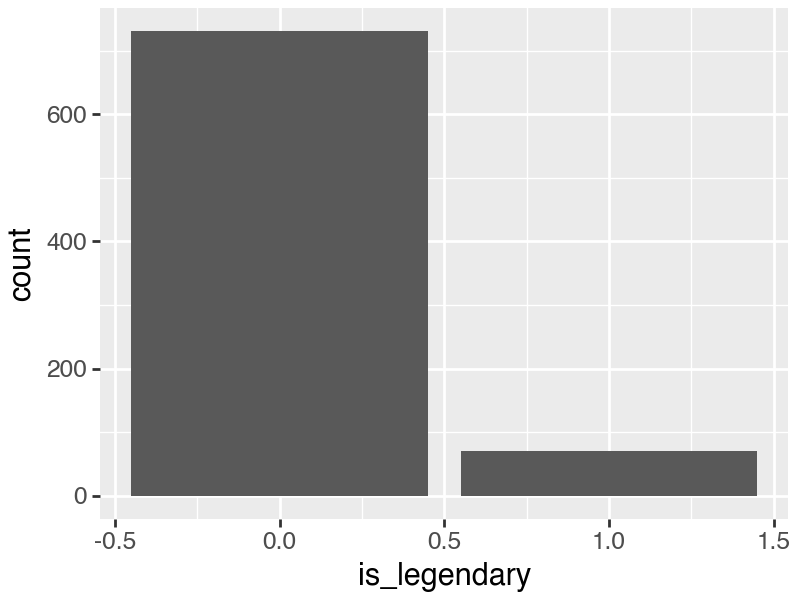

In [59]:
# static chart 

plot = (
          ggplot(df) + geom_bar(aes(x='is_legendary')) + theme(figure_size=(4,3))
          )

plot.show()

#### 3.4.2 Heatmap: Correlation 

In [60]:
corr_matrix = df.corr( numeric_only=True)

print(corr_matrix)

                     attack  base_egg_steps  base_happiness  base_total  \
attack             1.000000        0.331088       -0.251811    0.730134   
base_egg_steps     0.331088        1.000000       -0.524551    0.496466   
base_happiness    -0.251811       -0.524551        1.000000   -0.274795   
base_total         0.730134        0.496466       -0.274795    1.000000   
defense            0.468915        0.265230       -0.191503    0.629620   
experience_growth  0.241087        0.373837       -0.295348    0.256930   
sp_attack          0.368154        0.404477       -0.228924    0.741120   
sp_defense         0.265836        0.335404       -0.149719    0.717434   
speed              0.352703        0.289447       -0.148753    0.547666   
generation         0.101375        0.128941       -0.115974    0.084358   
is_legendary       0.303295        0.873488       -0.413108    0.485440   

                    defense  experience_growth  sp_attack  sp_defense  \
attack             0.46891

In [61]:
# heatmap 

fig2 = px.imshow(
          corr_matrix, 
          text_auto=True,
          aspect='auto'
)

fig2.show()

### 3.5 Data Transformation

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   attack             801 non-null    int64 
 1   base_egg_steps     801 non-null    int64 
 2   base_happiness     801 non-null    int64 
 3   base_total         801 non-null    int64 
 4   capture_rate       801 non-null    object
 5   classfication      801 non-null    object
 6   defense            801 non-null    int64 
 7   experience_growth  801 non-null    int64 
 8   sp_attack          801 non-null    int64 
 9   sp_defense         801 non-null    int64 
 10  speed              801 non-null    int64 
 11  type1              801 non-null    object
 12  generation         801 non-null    int64 
 13  is_legendary       801 non-null    int64 
dtypes: int64(11), object(3)
memory usage: 87.7+ KB


In [63]:
object_columns = ['capture_rate', 'classfication', 'type1']

rows6 = df.loc[:, object_columns].iloc[:6]

print(rows6)

  capture_rate   classfication  type1
0           45    Seed Pokémon  grass
1           45    Seed Pokémon  grass
2           45    Seed Pokémon  grass
3           45  Lizard Pokémon   fire
4           45   Flame Pokémon   fire
5           45   Flame Pokémon   fire


In [64]:
df.capture_rate.unique()

array(['45', '255', '120', '127', '90', '190', '75', '235', '150', '25',
       '170', '50', '200', '100', '180', '60', '225', '30', '35', '3',
       '65', '70', '125', '205', '155', '145', '130', '140', '15', '220',
       '160', '80', '55', '30 (Meteorite)255 (Core)'], dtype=object)

After reviewing the dataset and the capture_rate column, I noticed that there is only 1 cell with the string '30 (Meteorite)255 (Core)'. Considering the pokemon is a metheor pokemon, I will change the cell value to 30. 

In [65]:
# relace the string
df['capture_rate'] = df['capture_rate'].replace('30 (Meteorite)255 (Core)', '30')

# change capture_rate to numeric
df['capture_rate'] = pd.to_numeric(df['capture_rate'])

print(df.capture_rate.unique())

print(df.dtypes)

[ 45 255 120 127  90 190  75 235 150  25 170  50 200 100 180  60 225  30
  35   3  65  70 125 205 155 145 130 140  15 220 160  80  55]
attack                int64
base_egg_steps        int64
base_happiness        int64
base_total            int64
capture_rate          int64
classfication        object
defense               int64
experience_growth     int64
sp_attack             int64
sp_defense            int64
speed                 int64
type1                object
generation            int64
is_legendary          int64
dtype: object


#### 3.5.1 Train-Test Split

In [66]:
# features and target 
X = df.iloc[:, :-1]

y = df.iloc[:, -1]

# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

In [67]:
X_test

,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,sp_attack,sp_defense,speed,type1,generation
697,59,7680,70,362,45,Tundra Pokémon,50,1000000,67,63,46,rock,6
668,38,5120,70,303,225,Single Bloom Pokémon,39,1000000,61,79,42,fairy,6
63,35,5120,70,400,100,Psi Pokémon,30,1059860,120,70,105,psychic,1
534,50,5120,70,294,255,Tadpole Pokémon,40,1059860,50,40,64,water,5
66,100,5120,70,405,90,Superpower Pokémon,70,1059860,50,60,45,fighting,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,107,30720,0,600,3,Prism Pokémon,101,1250000,127,89,79,psychic,7
745,140,3840,70,620,60,Small Fry Pokémon,130,800000,140,135,30,water,7
513,98,5120,70,498,75,Ember Pokémon,63,1000000,98,63,101,fire,5
671,65,5120,70,350,200,Mount Pokémon,48,1000000,62,57,52,grass,6


#### 3.5.2 Column Transformer: Standard Scaler; OneHotEncoder

In [68]:
preprocessor = ColumnTransformer(
          transformers=[
                    ('num', StandardScaler(), ['attack', 'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate', 'defense', 'experience_growth', 'sp_attack', 'sp_defense', 'speed', 'generation']),
                    ('cat', OneHotEncoder(handle_unknown='ignore'), ['classfication', 'type1'])
          ]
)

In [69]:
# apply transformations on training data (features)
X_train_standardised = preprocessor.fit_transform(X_train)

# transform test
X_test_standardised = preprocessor.transform(X_test)

### 3.6 Logistic Regression 

In [70]:
# create a logistic regression object
lgr = LogisticRegression(random_state=0)

# train model 
model = lgr.fit(X_train_standardised, y_train)

In [71]:
y_predict = model.predict(X_test_standardised)


In [72]:
y_predict

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0])

In [83]:
# ROC AUC Score

from sklearn.metrics import RocCurveDisplay


score = roc_auc_score(y_test, y_predict)

print(f"ROC AUC: {score}")

RocCurveDisplay()


ROC AUC: 0.9131701631701633


<function sklearn.metrics._ranking.roc_curve(y_true, y_score, *, pos_label=None, sample_weight=None, drop_intermediate=True)>

In [75]:

cm = confusion_matrix(y_test, y_predict)

print(f"Confussion matrix: {cm}")

Confussion matrix: [[142   1]
 [  3  15]]


In [78]:
# Accuracy 
from sklearn.metrics import accuracy_score


accuracy = accuracy_score(y_test, y_predict)

print(f"accuracy: {accuracy}")

accuracy: 0.9751552795031055


## 4. Iris dataset - multiclass classifier 

In [79]:
from sklearn import datasets

iris = datasets.load_iris()
f = iris.data
t = iris.target


In [80]:
scaler = StandardScaler()
f_standardised = scaler.fit_transform(f)


In [81]:
# create a one-vs-rest logistic regression object
lr_mc = LogisticRegression(random_state= 0, multi_class='ovr')

In [82]:
# train model 
model = lr_mc.fit(f_standardised, t)

/Users/cat.barbosa/Library/CloudStorage/OneDrive-MCO/Projects/datascienceAlwaysLearning/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.

